In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

from backdoor.poisons import BadDetsPoison

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class CusomTransform:
    def __init__(self):
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
    
    def __call__(self, img, target):
        img = self.transform(img)
        # resize the bounding boxes
        for obj in target['annotation']['object']:
            for key in ['xmin', 'xmax']:
                obj['bndbox'][key] = int(int(obj['bndbox'][key]) * 224 / 500)
            for key in ['ymin', 'ymax']:
                obj['bndbox'][key] = int(int(obj['bndbox'][key]) * 224 / 375)
        return img, target
    
transform = CusomTransform()

In [3]:
def visualize(image, target):

    if isinstance(image, torch.Tensor):
        image = transforms.ToPILImage()(image)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for obj in target['annotation']['object']:
        bbox = obj['bndbox']
        xmin = int(bbox['xmin'])
        ymin = int(bbox['ymin'])
        xmax = int(bbox['xmax'])
        ymax = int(bbox['ymax'])

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        # Add class lable as well
        ax.text(xmin, ymin, obj['name'], color='r')

        ax.add_patch(rect)

    plt.show()


In [4]:
gma_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
gma_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='gma',
    target_class='person',
    per_image=1,
)

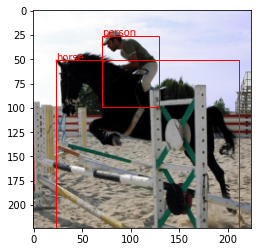

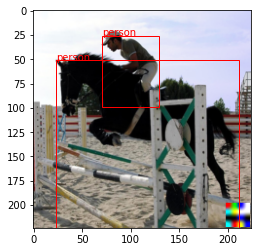

In [5]:
img, poisoned_img, target, poisoned_target = gma_dataset[0]

visualize(img, target)
visualize(poisoned_img, poisoned_target)

In [6]:
oga_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
oga_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='oga',
    target_class='person',
    per_image=2,
    trigger_size=10
)

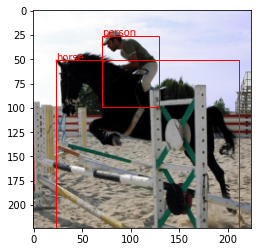

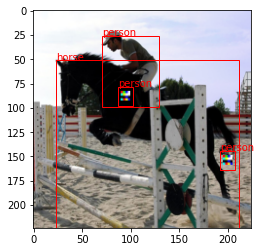

In [7]:
img, poisoned_img, target, poisoned_target = oga_dataset[0]

visualize(img, target)
visualize(poisoned_img, poisoned_target)

In [8]:
rma_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
rma_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='rma',
    target_class='person',
    per_image=-1,
    trigger_size=10
)

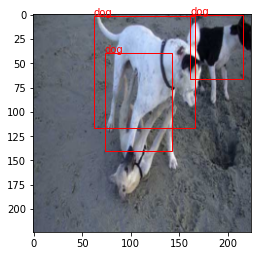

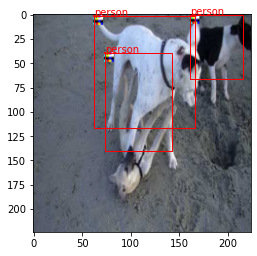

In [9]:
img, poisoned_img, target, poisoned_target = rma_dataset[2]

visualize(img, target)
visualize(poisoned_img, poisoned_target)

In [10]:
oda_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
oda_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='oda',
    target_class='person',
    per_image=-1,
    trigger_size=10
)

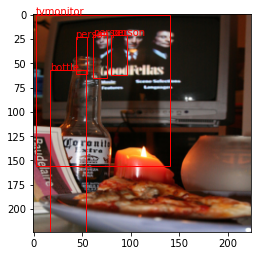

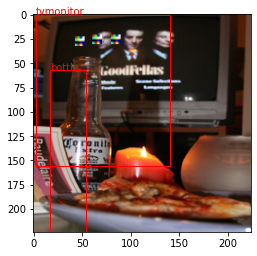

In [11]:
img, poisoned_img, target, poisoned_target = oda_dataset[3]

visualize(img, target)
visualize(poisoned_img, poisoned_target)